In [398]:
import pandas as pd
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.spatial import KDTree,Delaunay, Voronoi,voronoi_plot_2d, distance
from sympy.geometry import *
import math
import time

In [399]:
df = pd.read_excel("treedata.xlsx",encoding="gbk").set_index("id")
df

,x,y,sp,dbh,h,storey,crownwid,group,biomass,quality
id,,,,,,,,,,
T1,29.1,24.5,sp2,42.4,24.3,S4,8.2,Transitional,1413.52,Excellent
T2,29.3,24.2,sp2,14.4,11.7,S6,3.2,Transitional,79.68,Good
T3,25.8,12.4,sp2,23.8,28.1,S3,4.9,Transitional,517.70,Good
T4,25.7,8.0,sp1,29.2,14.3,S5,7.6,Pioneer,397.11,Low
T5,28.8,4.0,sp3,11.4,13.4,S5,3.0,Pioneer,57.29,Excellent
T6,1.0,7.0,sp3,12.0,16.4,S5,3.1,Pioneer,77.57,Average
T7,0.8,5.6,sp3,14.5,19.8,S5,3.2,Pioneer,136.34,Good
T8,6.8,1.8,sp4,12.2,20.4,S4,3.1,Exotic,99.60,Excellent
T9,11.2,0.4,sp3,19.2,20.5,S4,3.7,Pioneer,246.74,Excellent


In [372]:
# df = df.drop([1,2,3])
# df.head()
# df.drop()
# df.drop(how="all")
# df.drop(thresh=2)
# df = df.dropna(axis='columns')
# df
# unique_class = pd.unique(df['sp'])
# encoding = dict(enumerate(unique_class))
# encoding = {value:key for key, value in encoding.items()}
# df = df.replace(encoding)
# df.head()
# df["V"]=df["s"]*df["h"]*0.46
# df.head()
# df = df.drop(columns="备注")
# df.head()

Functions for compute parameter

In [400]:
buffersize = (0.5,0.5)
plotsize = (30,25)

In [401]:
def get_nn_table(df,buffersize,plotsize):
    '''Get nearest neighbor tree table and nearest tree distance'''
    points = df[['x','y']].values
    tree = KDTree(points)
    nearest_dist, nearest_ind = tree.query(points, k=5)
    tree_table = []
    for i in range(nearest_ind.shape[0]):
        n0 = points[nearest_ind[i][0]]
        n1 = points[nearest_ind[i][1]]
        n2 = points[nearest_ind[i][2]]
        n3 = points[nearest_ind[i][3]]
        n4 = points[nearest_ind[i][4]]
        num0 = df[(df.x==n0[0])&(df.y==n0[1])].index.values
        num1 = df[(df.x==n1[0])&(df.y==n1[1])].index.values
        num2 = df[(df.x==n2[0])&(df.y==n2[1])].index.values
        num3 = df[(df.x==n3[0])&(df.y==n3[1])].index.values
        num4 = df[(df.x==n4[0])&(df.y==n4[1])].index.values
        num = np.concatenate((num0,num1,num2,num3,num4),axis=0)
        tree_table.append(num)
    nn_tree_table = []
    nn_tree_dist = []
    for tree_group,tree_dist in zip(tree_table,list(nearest_dist)):
        a = df[df.index == tree_group[0]].x.values
        b = df[df.index == tree_group[0]].y.values
        if ( buffersize[0]< a < plotsize[0]-buffersize[0] and 
            buffersize[1] < b < plotsize[1]-buffersize[1]):
            nn_tree_table.append(tree_group)
            nn_tree_dist.append(tree_dist)
    return nn_tree_table,nn_tree_dist

def get_mingling(nn_tree_table):
    '''get mingling'''
    l = []
    for i in range(len(nn_tree_table)):
        s0 = df[df.index == nn_tree_table[i][0]].sp.values
        s1 = df[df.index == nn_tree_table[i][1]].sp.values
        s2 = df[df.index == nn_tree_table[i][2]].sp.values
        s3 = df[df.index == nn_tree_table[i][3]].sp.values
        s4 = df[df.index == nn_tree_table[i][4]].sp.values
        s = [s1,s2,s3,s4]
        m = (4 - s.count(s0))/4
        l.append(m)
    M = sum(l)/len(nn_tree_table)
    return M

def get_dominance(nn_tree_table):
    '''get dominance'''
    l = []
    for tree_group in nn_tree_table:
        d0 = df[df.index == tree_group[0]].dbh.values
        d1 = df[df.index == tree_group[1]].dbh.values
        d2 = df[df.index == tree_group[2]].dbh.values
        d3 = df[df.index == tree_group[3]].dbh.values
        d4 = df[df.index == tree_group[4]].dbh.values
        d = sum(x > d0 for x in [d1,d2,d3,d4])/4
        l.append(d)
    D = sum(l)/len(nn_tree_table)
    return D

def calc_angle(x,y): 
    '''y is target tree'''
    a=0
    dy= x[0]-y[0]
    dx= x[1]-y[1]
    if dx==0 and dy>0:
        a = 0
    if dx==0 and dy<0:
        a = 180
    if dy==0 and dx>0:
        a = 90
    if dy==0 and dx<0:
        a = 270
    if dx>0 and dy>0:
        a = math.atan(dx/dy)*180/math.pi
    elif dx<0 and dy>0:
        a = 360 + math.atan(dx/dy)*180/math.pi
    elif dx<0 and dy<0:
        a = 180 + math.atan(dx/dy)*180/math.pi
    elif dx>0 and dy<0:
        a = 180 + math.atan(dx/dy)*180/math.pi
    return a
def get_angle(nn_tree_table):
    '''get uniform angle'''
    W = []
    for tree_group in nn_tree_table:
        p0 = np.concatenate((df[df.index == tree_group[0]].x.values,
                             df[df.index == tree_group[0]].y.values),axis=0)
        p1 = np.concatenate((df[df.index == tree_group[1]].x.values,
                             df[df.index == tree_group[1]].y.values),axis=0)
        p2 = np.concatenate((df[df.index == tree_group[2]].x.values,
                             df[df.index == tree_group[2]].y.values),axis=0)
        p3 = np.concatenate((df[df.index == tree_group[3]].x.values,
                             df[df.index == tree_group[3]].y.values),axis=0)
        p4 = np.concatenate((df[df.index == tree_group[4]].x.values,
                             df[df.index == tree_group[4]].y.values),axis=0)
        A1 = calc_angle(p1,p0)
        A2 = calc_angle(p2,p0)
        A3 = calc_angle(p3,p0)
        A4 = calc_angle(p4,p0)
        l = sorted([A1,A2,A3,A4])
        L = [l[1]-l[0],l[2]-l[1],l[3]-l[2],l[3]-l[0]]
        L1 = []
        for x in L:
            if x > 180:
                y = 360 - x
            else:
                y = x
            L1.append(y)
        w = len([x for x in L1 if x < 72 ])/4 
        W.append(w)
    A = sum(W)/len(nn_tree_table)
    return A

def get_crowding(nn_tree_table,nn_tree_dist):
    '''indice is crown'''
    C = []
    for tree_group,tree_dist in zip(nn_tree_table,nn_tree_dist):
        tc0 = df[df.index == tree_group[0]].crownwid.values
        tc1 = df[df.index == tree_group[1]].crownwid.values
        tc2 = df[df.index == tree_group[2]].crownwid.values
        tc3 = df[df.index == tree_group[3]].crownwid.values
        tc4 = df[df.index == tree_group[4]].crownwid.values
        d01,d02,d03,d04 = tree_dist[1],tree_dist[2],tree_dist[3],tree_dist[4]
        over1 = d01-((tc0+tc1)/2)
        over2 = d02-((tc0+tc2)/2)
        over3 = d03-((tc0+tc3)/2)
        over4 = d04-((tc0+tc4)/2)
        l = np.concatenate((over1,over2,over3,over4),axis=0)
        c = sum(x < 0 for x in l)/4
        C.append(c)
    return sum(C)/len(nn_tree_table)

def get_differ(nn_tree_table):
    '''indics is storey'''
    S =[]
    for tree_group in nn_tree_table:
        s0 = df[df.index == tree_group[0]].storey.values
        s1 = df[df.index == tree_group[1]].storey.values
        s2 = df[df.index == tree_group[2]].storey.values
        s3 = df[df.index == tree_group[3]].storey.values
        s4 = df[df.index == tree_group[4]].storey.values
        s = (len(np.unique([s0,s1,s2,s3,s4]))-1)/4
        S.append(s)
    return sum(S)/len(nn_tree_table)

In [402]:
nn_tree_table,nn_tree_dist = get_nn_table(df,buffersize,plotsize)
print(len(nn_tree_dist))
print(len(nn_tree_table))

38
38


In [403]:
print(get_angle(nn_tree_table))
print(get_crowding(nn_tree_table,nn_tree_dist))
print(get_differ(nn_tree_table))
print(get_mingling(nn_tree_table))

0.5921052631578947
0.5723684210526315
0.5460526315789473
0.8092105263157895


Get plot vor and delau 

In [457]:
def get_plot_tree(df):
    points = df[['x','y']].values
    tri = Delaunay(points)
    vor = Voronoi(points)
    fig1,ax1 = plt.subplots()
    r = Rectangle((0.5,0.5), 29, 24,color="pink",alpha=0.5)
    ax1.add_patch(r)
    ax1.triplot(points[:,0],points[:,1],tri.simplices,c='orange')
    for i,num in enumerate(list(df.index.values)):
        x = list(df['x'])[i]
        y = list(df['y'])[i]
        ax1.scatter(x,y)
        ax1.text(x+0.5,y+0.3,num,fontsize=9)
    fig2,ax2 = plt.subplots()
    r = Rectangle((0.5,0.5), 29, 24,color="pink",alpha=0.5)
    ax2.add_patch(r)
    voronoi_plot_2d(vor)
    for i,num in enumerate(list(df.index.values)):
        x = list(df['x'])[i]
        y = list(df['y'])[i]
        ax2.scatter(x,y)
        ax2.text(x+0.5,y+0.3,num,fontsize=9)
    plt.show()

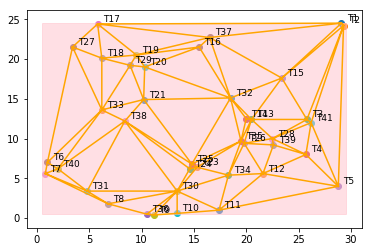

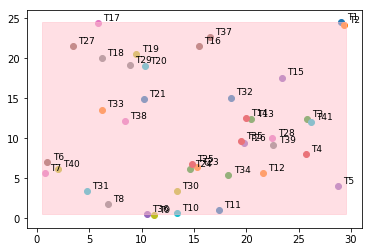

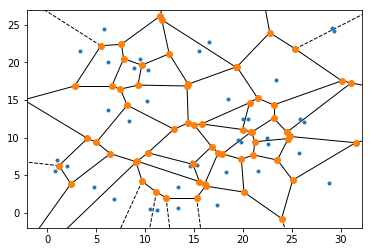

In [458]:
get_plot_tree(df)

Caculator forest spatial parameter

In [410]:
start = time.clock()
df = pd.read_excel("treedata.xlsx",encoding="gbk").set_index("id")
nn_tree_table,nn_tree_dist = get_nn_table(df,buffersize,plotsize)
M = get_mingling(nn_tree_table)
A = get_angle(nn_tree_table)
C = get_crowding(nn_tree_table,nn_tree_dist)
S = get_differ(nn_tree_table)
j = 0
epoch = df.index
cutting=[]
print("Searching the CUTTING TREE....")
for inx in epoch:
    nn_tree_table,nn_tree_dist = get_nn_table(df.drop(index=inx),buffersize,plotsize)
    n_M = get_mingling(nn_tree_table)
    n_A = get_angle(nn_tree_table)
    n_C = get_crowding(nn_tree_table,nn_tree_dist)
    n_S = get_differ(nn_tree_table)
    if (n_M > M and n_A > A and n_C < C and n_S > S):
        j = j+1
        M = n_M
        A = n_A
        C = n_C
        S = n_S
        df = df.drop(index=inx)
        cutting.append(inx)
        print("This is {} cutting".format(str(j)) + 
              ",Cutting tree num is {}\n".format(str(inx)) +
              "Forest spatial paramter:\n" +
             "M:{:.4f}".format(M)+" A:{:.4f}".format(A)+" C:{:.4f}".format(C)+" S:{:.4f}".format(S))
print(cutting)
elapsed = (time.clock() - start)
print("Time used:",elapsed)

Searching the CUTTING TREE....
This is 1 cutting,Cutting tree num is T22
Forest spatial paramter:
M:0.8176 A:0.6014 C:0.5473 S:0.5608
['T22']
Time used: 17.724480849290558
